# Houses and Appartments in Belgium

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv("./datasets/Kangaroo.csv")

df.head()

,Unnamed: 0,id,url,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,...,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,accessibleDisabledPeople,epcScore,price
0,0,20661494.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,7.0,NaN,NaN,C,399000.0
1,1,20647642.0,https://www.immoweb.be/en/classified/house/for...,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,...,True,3.0,NaN,NaN,True,1.0,NaN,NaN,E,895000.0
2,2,20644816.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,2.0,NaN,NaN,F,465000.0
3,3,20659813.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,...,NaN,2.0,NaN,NaN,True,3.0,NaN,NaN,B,590000.0
4,4,20633249.0,https://www.immoweb.be/en/classified/flat-stud...,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,E,289000.0


## Remove Unnamed and url

In [88]:
df = df.drop(columns=["Unnamed: 0", "url"])
df.head()

,id,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,habitableSurface,roomCount,...,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,accessibleDisabledPeople,epcScore,price
0,20661494.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,100.0,NaN,...,NaN,1.0,NaN,NaN,True,7.0,NaN,NaN,C,399000.0
1,20647642.0,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,270.0,12.0,...,True,3.0,NaN,NaN,True,1.0,NaN,NaN,E,895000.0
2,20644816.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,87.0,NaN,...,NaN,1.0,NaN,NaN,True,2.0,NaN,NaN,F,465000.0
3,20659813.0,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,104.0,NaN,...,NaN,2.0,NaN,NaN,True,3.0,NaN,NaN,B,590000.0
4,20633249.0,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,71.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,E,289000.0


In [113]:
print(f"shape = {df.shape}")
print(f"columns : {df.columns}")
print(f"NAN values : \n{df.isna().sum()}")
print("Percentage of nan values : ")
print((df.isna().mean() * 100).round(2).astype(str) + ' %')

shape = (53179, 50)
columns : Index(['id', 'type', 'subtype', 'bedroomCount', 'bathroomCount', 'province',
       'locality', 'postCode', 'habitableSurface', 'roomCount', 'hasAttic',
       'hasBasement', 'hasDressingRoom', 'diningRoomSurface', 'hasDiningRoom',
       'buildingCondition', 'buildingConstructionYear', 'floorCount',
       'streetFacadeWidth', 'hasLift', 'floodZoneType', 'heatingType',
       'hasHeatPump', 'hasPhotovoltaicPanels', 'hasThermicPanels',
       'kitchenSurface', 'kitchenType', 'landSurface', 'hasLivingRoom',
       'livingRoomSurface', 'hasGarden', 'gardenSurface', 'gardenOrientation',
       'parkingCountIndoor', 'parkingCountOutdoor', 'hasAirConditioning',
       'hasArmoredDoor', 'hasVisiophone', 'hasOffice', 'toiletCount',
       'hasSwimmingPool', 'hasFireplace', 'hasTerrace', 'terraceSurface',
       'terraceOrientation', 'epcScore', 'price', 'facadeCount',
       'parkingCount', 'region'],
      dtype='object')
NAN values : 
id                        

These columns have a lot of nan (will delete these columns):
- monthlyCost : 100%
- hasBalcony : 100%
- accessibleDisabledPeople : 100%


In [90]:
df = df.drop(columns=['monthlyCost', 'hasBalcony', 'accessibleDisabledPeople'])
df.head()

,id,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,habitableSurface,roomCount,...,hasVisiophone,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,epcScore,price
0,20661494.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,100.0,NaN,...,True,NaN,1.0,NaN,NaN,True,7.0,NaN,C,399000.0
1,20647642.0,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,270.0,12.0,...,NaN,True,3.0,NaN,NaN,True,1.0,NaN,E,895000.0
2,20644816.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,87.0,NaN,...,NaN,NaN,1.0,NaN,NaN,True,2.0,NaN,F,465000.0
3,20659813.0,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,104.0,NaN,...,True,NaN,2.0,NaN,NaN,True,3.0,NaN,B,590000.0
4,20633249.0,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,71.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,E,289000.0


In [91]:
df.duplicated(subset=["id"]).sum()
dups = df.pivot_table(index = ['id'], aggfunc ='size')
print(dups[dups > 1]) 

df = df.drop_duplicates(subset=["id"], keep="first")

dups = df.pivot_table(index = ['id'], aggfunc ='size')
print(dups[dups > 1]) 

id
20663057.0    2
dtype: int64
Series([], dtype: int64)


Replace these nan and False by 0 (and True by 1):
- hasAttic
- hasBasement
- hasDressingRoom
- hasDiningRoom
- hasLift
- hasHeatPump
- hasPhotovoltaicPanels
- hasHeatPump
- hasLivingRoom (if livingRoomSurface is nan or 0)
- hasGarden (if gardenSurface is nan or 0)
- parkingCountIndoor = nan -> 0
- parkingCountOutdoor = nan -> 0
- hasAirConditionning
- hasArmoredDoor
- hasVisiophone
- hasOffice
- hasSwimmingPool
- hasFirePlace
- hasTerrace (if terraceSurface = 0 or nan)


In [92]:
df['hasBasement'].value_counts()

hasBasement
True    29315
Name: count, dtype: int64

In [93]:
df['hasBasement'] = df['hasBasement'].replace({'False': 0, 'True': 1}).fillna(0).astype(float)

In [94]:
df['hasAttic'] = df['hasAttic'].replace({'False': 0, 'True': 1}).fillna(0).astype(float)
df['hasBasement'] = df['hasBasement'].replace({'False': 0, 'True': 1}).fillna(0).astype(float)
df['hasDressingRoom'] = df['hasDressingRoom'].replace({'False': 0, 'True': 1}).fillna(0).astype(float)
df['hasDiningRoom'] = df['hasDiningRoom'].replace({'False': 0, 'True': 1}).fillna(0).astype(float)
df['hasLift'] = df['hasLift'].replace({'False': 0, 'True': 1}).fillna(0).astype(float)
df['hasHeatPump'] = df['hasHeatPump'].replace({'False': 0, 'True': 1}).fillna(0).astype(float)
df['hasPhotovoltaicPanels'] = df['hasPhotovoltaicPanels'].replace({'False': 0, 'True': 1}).fillna(0).astype(float)
df['hasHeatPump'] = df['hasHeatPump'].replace({'False': 0, 'True': 1}).fillna(0).astype(float)
df['hasAirConditioning'] = df['hasAirConditioning'].replace({'False': 0, 'True': 1}).fillna(0).astype(float)
df['hasArmoredDoor'] = df['hasArmoredDoor'].replace({'False': 0, 'True': 1}).fillna(0).astype(float)
df['hasVisiophone'] = df['hasVisiophone'].replace({'False': 0, 'True': 1}).fillna(0).astype(float)
df['hasOffice'] = df['hasOffice'].replace({'False': 0, 'True': 1}).fillna(0).astype(float)
df['hasSwimmingPool'] = df['hasSwimmingPool'].replace({'False': 0, 'True': 1}).fillna(0).astype(float)
df['hasFireplace'] = df['hasFireplace'].replace({'False': 0, 'True': 1}).fillna(0).astype(float)
df['parkingCountIndoor'] = df['parkingCountIndoor'].replace({'False': 0, 'True': 1}).fillna(0).astype(float)
df['parkingCountOutdoor'] = df['parkingCountOutdoor'].replace({'False': 0, 'True': 1}).fillna(0).astype(float)

df['hasLivingRoom'] = df['hasLivingRoom'].replace({'False': 0, 'True': 1})
df.loc[df['hasLivingRoom'].isna(), 'hasLivingRoom'] = df['livingRoomSurface'].notnull().astype(float)

df['hasGarden'] = df['hasGarden'].replace({'False': 0, 'True': 1})
df.loc[df['hasGarden'].isna(), 'hasGarden'] = df['gardenSurface'].notnull().astype(float)

df['hasTerrace'] = df['hasTerrace'].replace({'False': 0, 'True': 1})
df.loc[df['hasTerrace'].isna(), 'hasTerrace'] = df['terraceSurface'].notnull().astype(float)



In [95]:
df['hasGarden'] = df['hasGarden'].replace({'False': 0, 'True': 1})

In [96]:
df.head()

,id,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,habitableSurface,roomCount,...,hasVisiophone,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,epcScore,price
0,20661494.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,100.0,NaN,...,1.0,0.0,1.0,0.0,0.0,True,7.0,NaN,C,399000.0
1,20647642.0,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,270.0,12.0,...,0.0,1.0,3.0,0.0,0.0,True,1.0,NaN,E,895000.0
2,20644816.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,87.0,NaN,...,0.0,0.0,1.0,0.0,0.0,True,2.0,NaN,F,465000.0
3,20659813.0,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,104.0,NaN,...,1.0,0.0,2.0,0.0,0.0,True,3.0,NaN,B,590000.0
4,20633249.0,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,71.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,E,289000.0


In [97]:
# When hasLivingRoom = 0 ; livingRoomSurface = 0
df.loc[df['hasLivingRoom'] == 0, 'livingRoomSurface'] = 0

# When hasGarden = 0 ; gardenSurface = 0
df.loc[df['hasGarden'] == 0, 'gardenSurface'] = 0

# When hasTerrace = 0 ; terraceSurface = 0 and terraceOrientation = 0
df.loc[df['hasTerrace'] == 0, 'terraceSurface'] = 0
df.loc[df['hasTerrace'] == 0, 'terraceOrientation'] = 0

#drop number of facade bigger than 4 and transform "facedeCount" into "facadeCount"
df = df[df['facedeCount'] <= 4]
df['facadeCount'] = df['facedeCount']
df = df.drop(columns='facedeCount')


In [98]:
df.head()

,id,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,habitableSurface,roomCount,...,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,epcScore,price,facadeCount
0,20661494.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,100.0,NaN,...,0.0,1.0,0.0,0.0,True,7.0,NaN,C,399000.0,1.0
1,20647642.0,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,270.0,12.0,...,1.0,3.0,0.0,0.0,True,1.0,NaN,E,895000.0,2.0
2,20644816.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,87.0,NaN,...,0.0,1.0,0.0,0.0,True,2.0,NaN,F,465000.0,2.0
4,20633249.0,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,71.0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0,E,289000.0,2.0
5,20639359.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,ETTERBEEK,1040,90.0,NaN,...,0.0,1.0,0.0,0.0,True,2.0,NaN,D,375000.0,2.0


In [99]:
df = df.dropna(subset="price")
df.shape

(53179, 48)

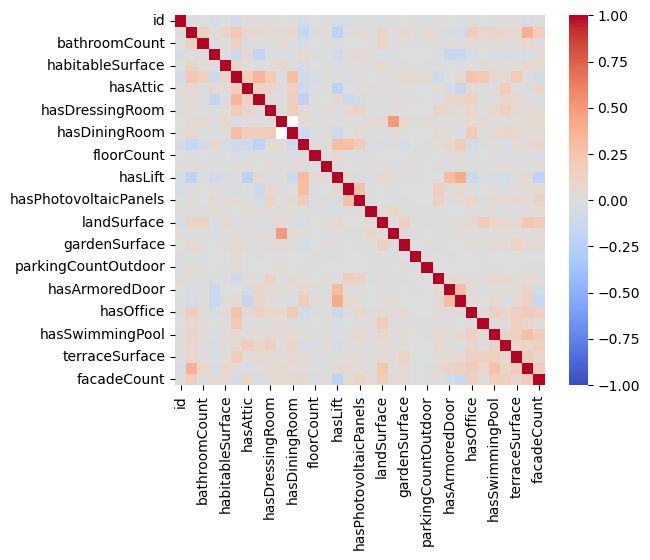

In [100]:
numeric_df = df.select_dtypes(include='number')
correlation_df = numeric_df.corr()

axis_corr = sns.heatmap(
correlation_df,
vmin=-1, vmax=1, center=0,
fmt=".2f",  
cmap='coolwarm',
square=True
)

plt.show()

In [101]:
numeric_2_df = df
numeric_2_df['parkingCount'] = numeric_2_df['parkingCountIndoor'] + numeric_2_df['parkingCountOutdoor']

In [102]:
numeric_2_df.columns

Index(['id', 'type', 'subtype', 'bedroomCount', 'bathroomCount', 'province',
       'locality', 'postCode', 'habitableSurface', 'roomCount', 'hasAttic',
       'hasBasement', 'hasDressingRoom', 'diningRoomSurface', 'hasDiningRoom',
       'buildingCondition', 'buildingConstructionYear', 'floorCount',
       'streetFacadeWidth', 'hasLift', 'floodZoneType', 'heatingType',
       'hasHeatPump', 'hasPhotovoltaicPanels', 'hasThermicPanels',
       'kitchenSurface', 'kitchenType', 'landSurface', 'hasLivingRoom',
       'livingRoomSurface', 'hasGarden', 'gardenSurface', 'gardenOrientation',
       'parkingCountIndoor', 'parkingCountOutdoor', 'hasAirConditioning',
       'hasArmoredDoor', 'hasVisiophone', 'hasOffice', 'toiletCount',
       'hasSwimmingPool', 'hasFireplace', 'hasTerrace', 'terraceSurface',
       'terraceOrientation', 'epcScore', 'price', 'facadeCount',
       'parkingCount'],
      dtype='object')

In [103]:
numeric_2_df = numeric_2_df[['bathroomCount',  'habitableSurface', 'hasDiningRoom', 'facedeCount', 
                  'streetFacadeWidth', 'kitchenSurface', 'livingRoomSurface', 'parkingCount', 'hasFireplace', 'price']]
correlation_2_df = numeric_2_df.corr()

axis_corr = sns.heatmap(
correlation_2_df,
vmin=-1, vmax=1, center=0,
fmt=".2f",  
cmap='coolwarm',
square=True
)

plt.show()

KeyError: "['facedeCount'] not in index"

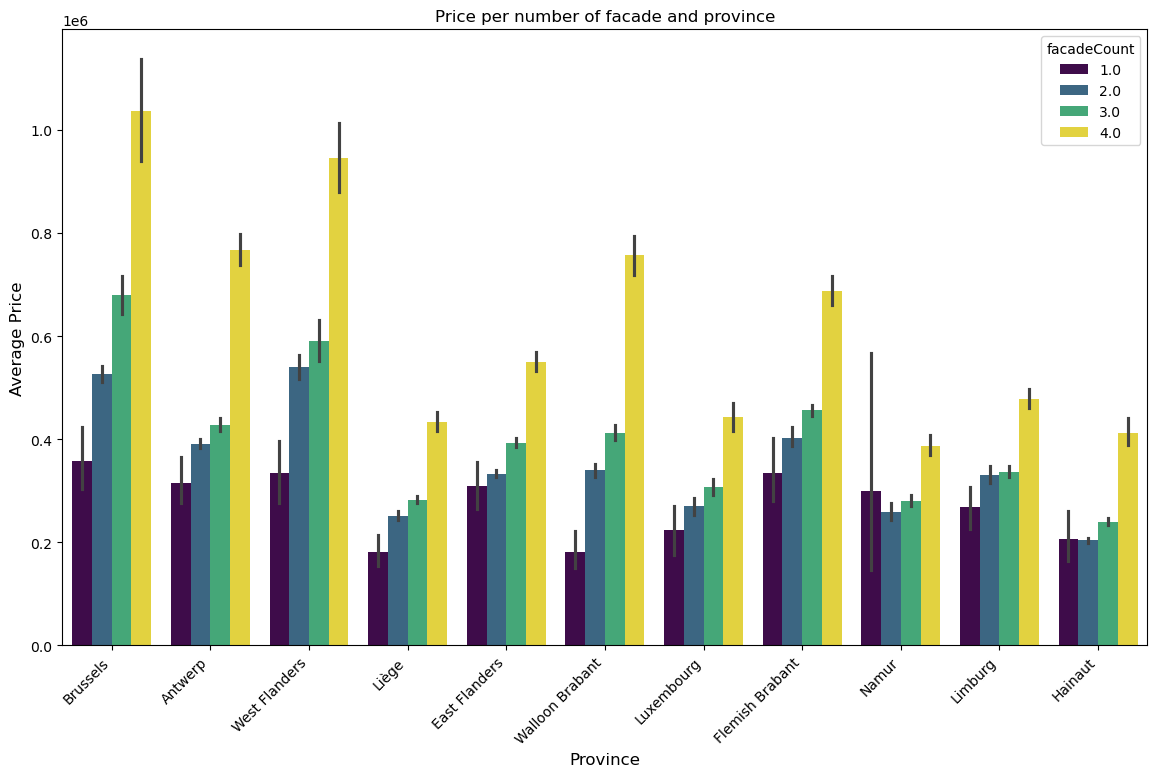

In [104]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='province', y='price', hue='facadeCount', palette='viridis')

plt.title("Price per number of facade and province")
plt.xlabel("Province", fontsize=12)

plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.show()

In [105]:
df['facadeCount'].value_counts()

facadeCount
2.0    24037
4.0    15371
3.0    13368
1.0      403
Name: count, dtype: int64

In [106]:
print(f"min = {df['habitableSurface'].min()}")
print(f"max = {df['habitableSurface'].max()}")
print(f"median = {df['habitableSurface'].median()}")

min = 6.0
max = 185347.0
median = 150.0


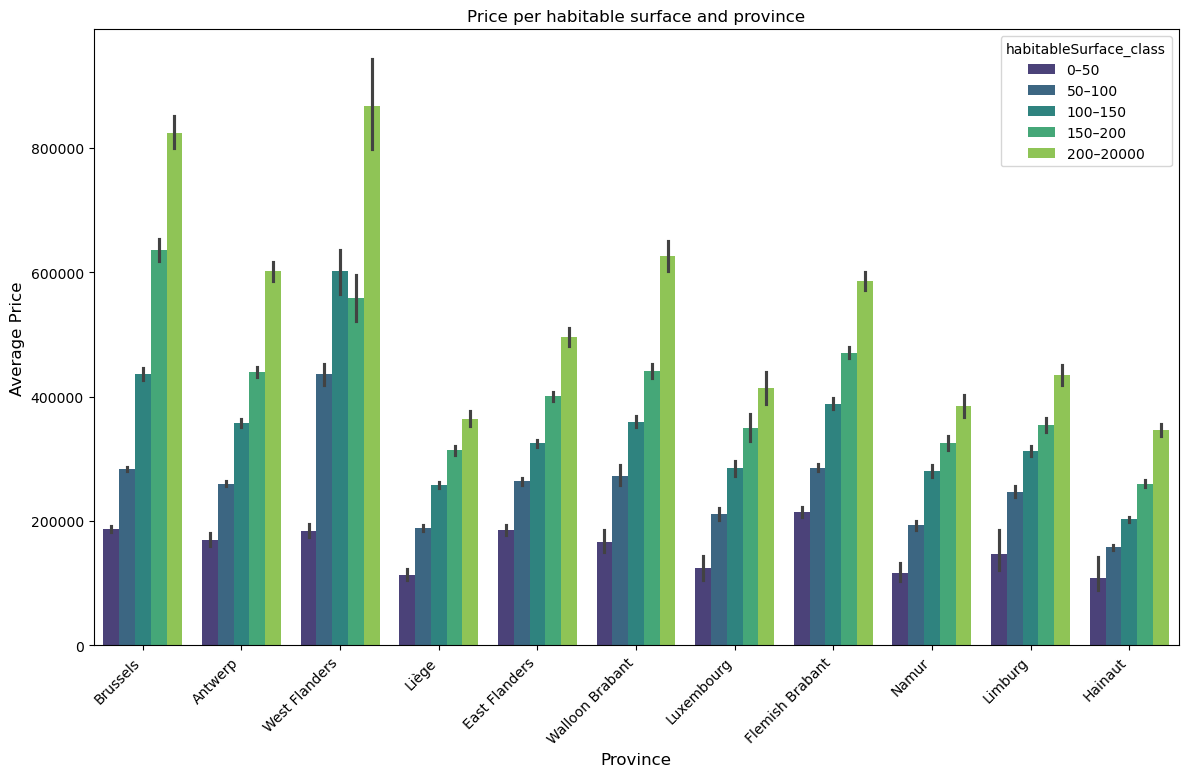

In [107]:
df['habitableSurface_class'] = pd.cut(df['habitableSurface'], bins=[0, 50, 100, 150, 200, 300], 
                             labels=['0–50', '50–100', '100–150', '150–200', '200–20000'])

plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='province', y='price', hue='habitableSurface_class', palette='viridis')

plt.title("Price per habitable surface and province")
plt.xlabel("Province", fontsize=12)

plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.show()

df = df.drop(columns=['habitableSurface_class'])

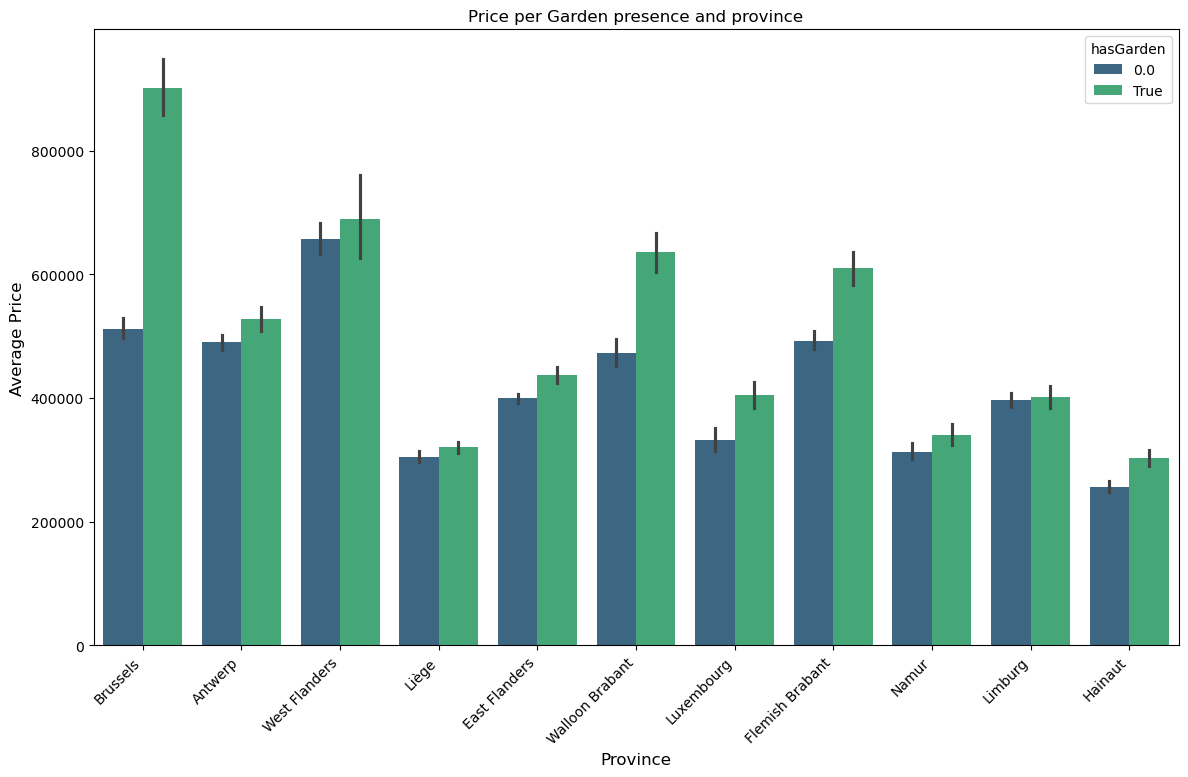

In [108]:

plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='province', y='price', hue='hasGarden', palette='viridis')

plt.title("Price per Garden presence and province")
plt.xlabel("Province", fontsize=12)

plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.show()


In [120]:
def get_region(zip_code):
    if 1000 <= zip_code <= 1299:
        return "Bruxelles"
    elif 1300 <= zip_code <= 1499 or 4000 <= zip_code <= 7999:
        return "Wallonia"
    else:
        return "Flanders"
    
df['region'] = df['postCode'].apply(get_region)

df.head()

,id,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,habitableSurface,roomCount,...,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,epcScore,price,facadeCount,parkingCount,region
0,20661494.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,100.0,NaN,...,0.0,0.0,True,7.0,NaN,C,399000.0,1.0,1.0,Bruxelles
1,20647642.0,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,270.0,12.0,...,0.0,0.0,True,1.0,NaN,E,895000.0,2.0,0.0,Bruxelles
2,20644816.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,87.0,NaN,...,0.0,0.0,True,2.0,NaN,F,465000.0,2.0,0.0,Bruxelles
4,20633249.0,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,71.0,NaN,...,0.0,0.0,0.0,0.0,0,E,289000.0,2.0,0.0,Bruxelles
5,20639359.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,ETTERBEEK,1040,90.0,NaN,...,0.0,0.0,True,2.0,NaN,D,375000.0,2.0,0.0,Bruxelles


/var/folders/rm/sf8lhmt553jc_j99njk5ft840000gn/T/ipykernel_63166/182706412.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='province', y='price', palette='viridis')


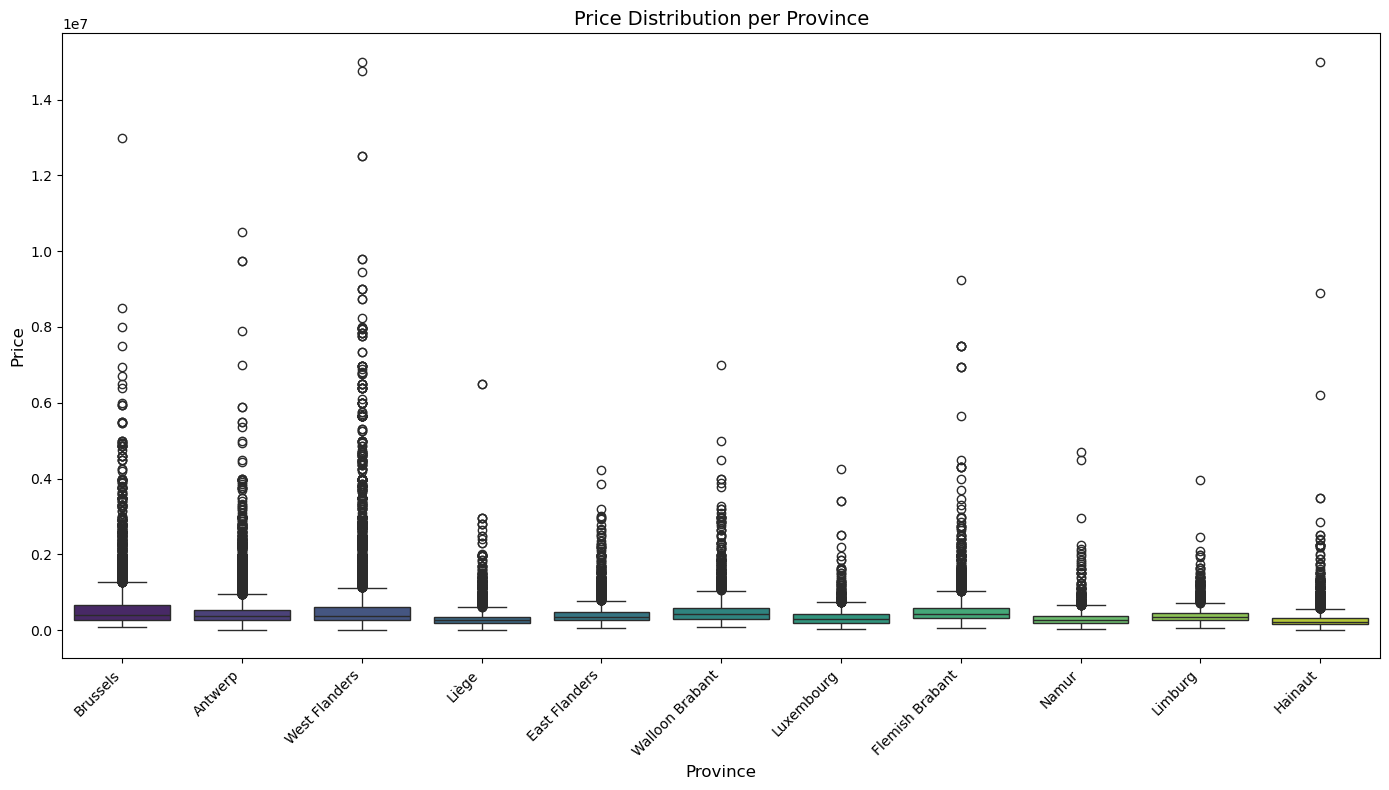

In [110]:
plt.figure(figsize=(14, 8))

sns.boxplot(data=df, x='province', y='price', palette='viridis')

plt.title("Price Distribution per Province", fontsize=14)
plt.xlabel("Province", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [111]:
df_without_expensives = df[df['price'] <= 3000000]

/var/folders/rm/sf8lhmt553jc_j99njk5ft840000gn/T/ipykernel_63166/4171630585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_expensives, x='province', y='price', palette='viridis')


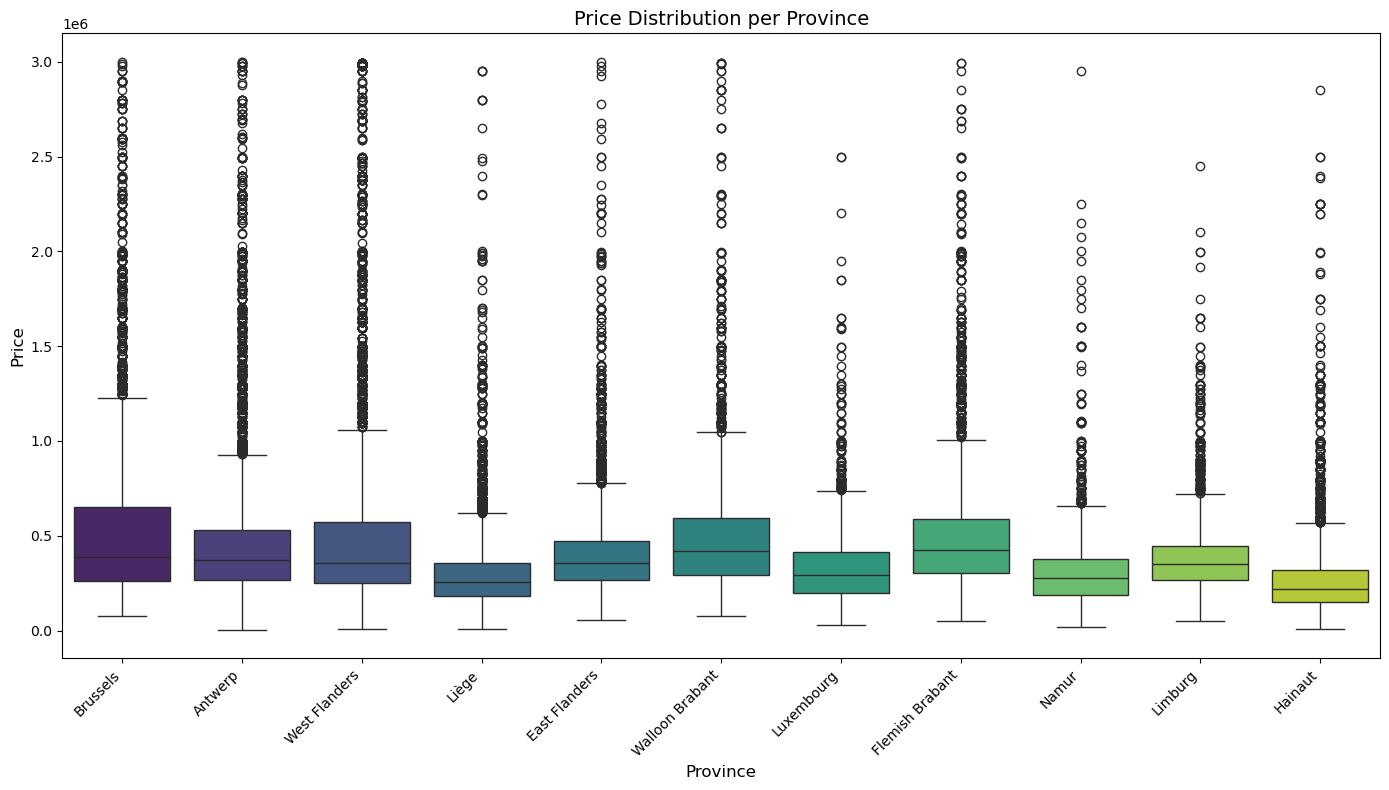

In [112]:
plt.figure(figsize=(14, 8))

sns.boxplot(data=df_without_expensives, x='province', y='price', palette='viridis')

plt.title("Price Distribution per Province", fontsize=14)
plt.xlabel("Province", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

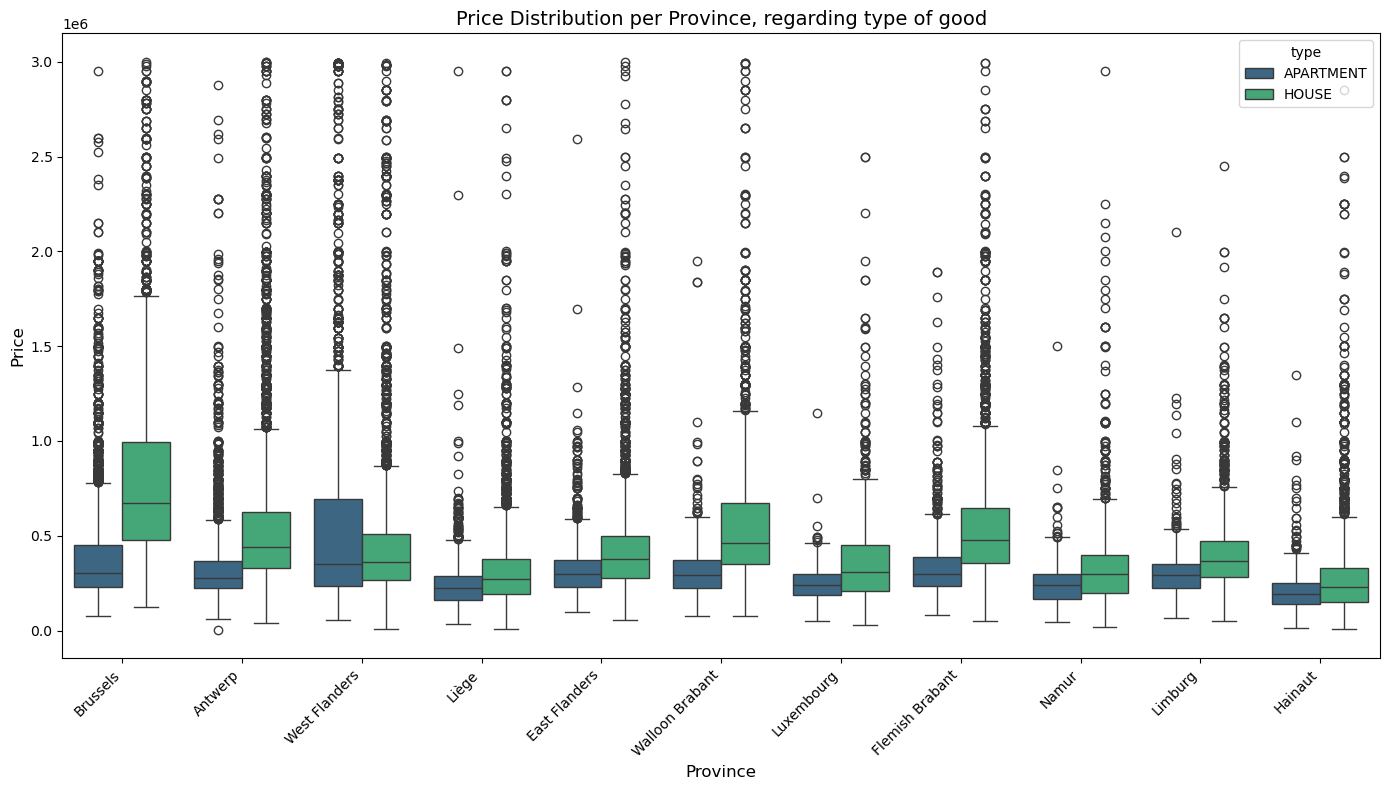

In [117]:
plt.figure(figsize=(14, 8))

sns.boxplot(data=df_without_expensives, x='province', y='price', hue='type', palette='viridis')

plt.title("Price Distribution per Province, regarding type of good", fontsize=14)
plt.xlabel("Province", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

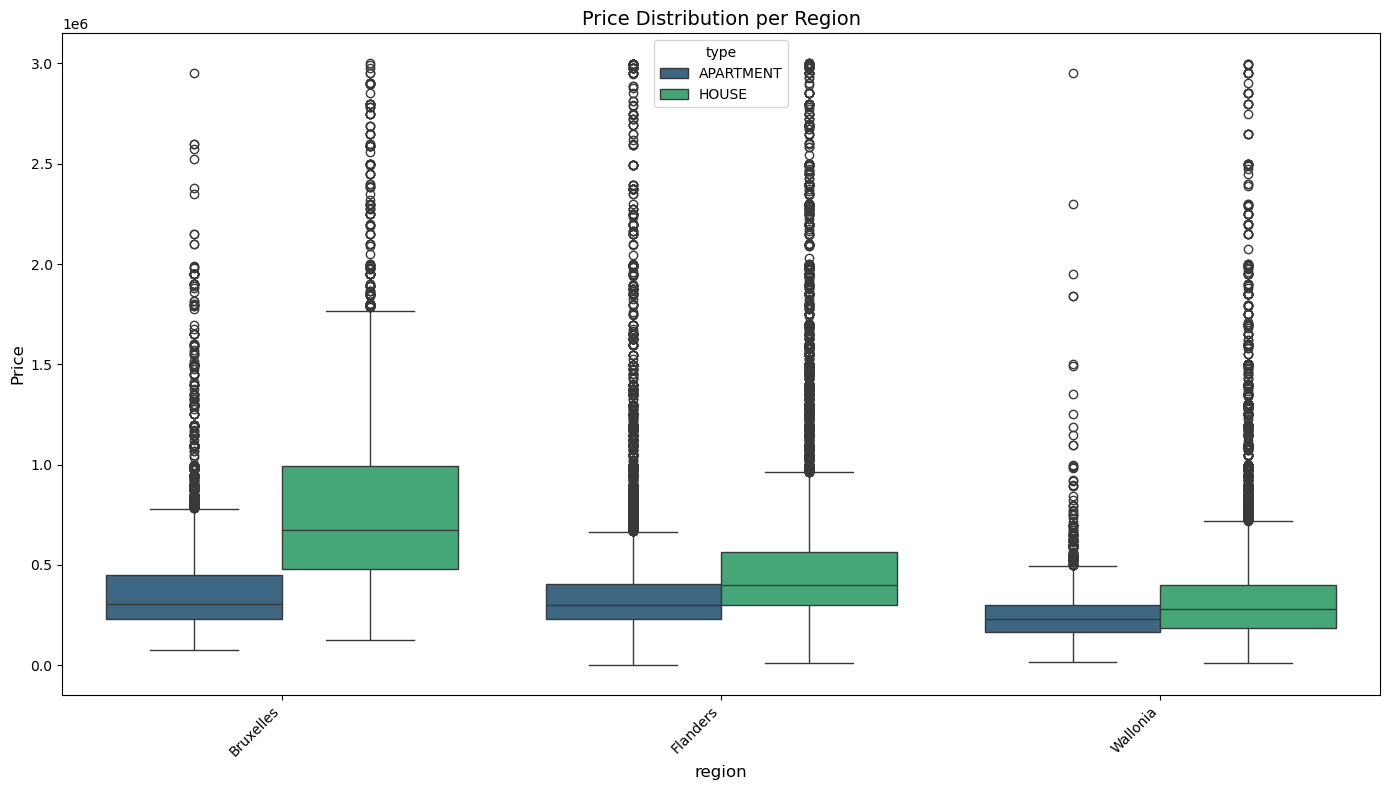

In [121]:
plt.figure(figsize=(14, 8))

sns.boxplot(data=df_without_expensives, x='region', y='price', hue='type', palette='viridis')

plt.title("Price Distribution per Region", fontsize=14)
plt.xlabel("region", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()